In [ ]:
! pip install scikit-activeml

# Imports

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_breast_cancer
from skactiveml.classifier import SklearnClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from skactiveml.utils import MISSING_LABEL, labeled_indices, unlabeled_indices
from skactiveml.pool import QueryByCommittee, RandomSampling, UncertaintySampling

# **A-Approach 1**

# Breast Cancer Daaset

In [2]:
breast_cancer = load_breast_cancer()
X, y_true = breast_cancer.data, breast_cancer.target

y_true = y_true % 2

# Split the dataset into initial labeled data and unlabeled data
X_lbld, X_unlbld, y_lbld, y_unlbld = train_test_split(X, y_true, test_size=0.8, stratify=y_true, random_state=42)

y_nan = np.full(shape=y_lbld.shape, fill_value=MISSING_LABEL)

# Number of repeated classifiers in the learning cycle
n_classifiers = 3 

# Using SVC Classifier

In [3]:
clff = SklearnClassifier(SVC(probability=True), classes=np.unique(y_true),random_state=42)

# 1-QBC x KL

/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:320: UserWarning: The 'base_estimator' could not be fitted because of 'There is no labeled data.'. Therefore, the class labels of the samples are counted and will be used to make predictions. The class label distribution is `_label_counts=[0, 0]`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:219: UserWarning: Since the 'base_estimator' could not be fitted when calling the `fit` method, the class label distribution`_label_counts=[0, 0]` is used to make the predictions.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:320: UserWarning: The 'base_estimator' could not be fitted because of 'There is no labeled data.'. Therefore, the class labels of the samples are counted and will be used to make predictions. The class label distribution is `_label_counts=[0, 0]`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/

F1 Score before active learning: 0.5950095969289827
F1 Score after active learning (Cycle 1): 0.2777857604101415
F1 Score after active learning (Cycle 2): 0.13889288020507076
F1 Score after active learning (Cycle 3): 0.09259525347004718
F1 Score after active learning (Cycle 4): 0.06944644010253538
F1 Score after active learning (Cycle 5): 0.055557152082028306
F1 Score after active learning (Cycle 6): 0.12262695778133575
F1 Score after active learning (Cycle 7): 0.2350354381184518
F1 Score after active learning (Cycle 8): 0.3185335918194641
F1 Score after active learning (Cycle 9): 0.38341427061195515
F1 Score after active learning (Cycle 10): 0.4353188136459479
F1 Score after active learning (Cycle 11): 0.47783716401691173
F1 Score after active learning (Cycle 12): 0.5132691226593815
F1 Score after active learning (Cycle 13): 0.5432500107414715
F1 Score after active learning (Cycle 14): 0.5689479148118343
F1 Score after active learning (Cycle 15): 0.591363684175647
F1 Score after activ

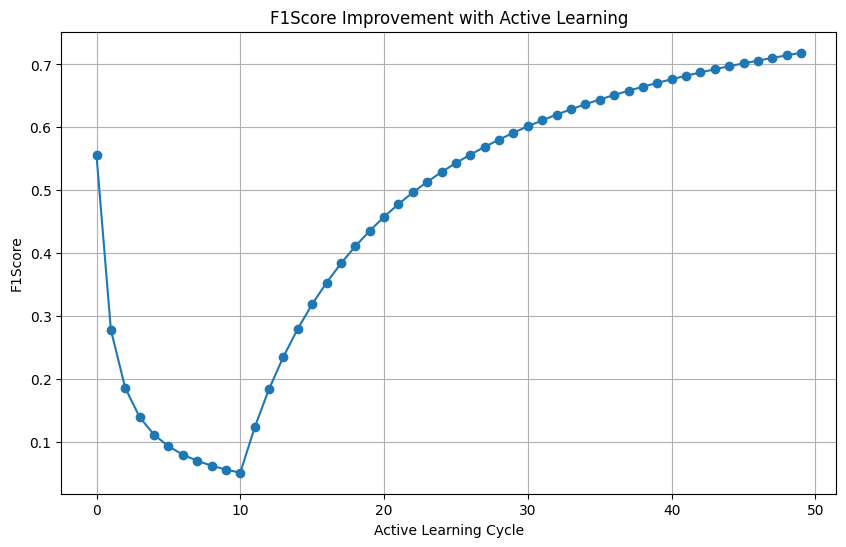

Testing F1Score:0.7226524738174627



In [4]:
clf1 = SklearnClassifier(SVC(probability=True), classes=np.unique(y_true),random_state=42)
qs = QueryByCommittee(method='KL_divergence',random_state=42)
classifier_list=[clf1 for _ in range(n_classifiers)]

clf1.fit(X_lbld, y_nan)

# Evaluate the classifier on the initial labeled data
y_pred_initial = clf1.predict(X_unlbld)
f1score_initial = f1_score(y_unlbld, y_pred_initial)
print("F1 Score before active learning:", f1score_initial)

# Active learning loop
n_cycles = 25
f1score_values1=[]
f1scores_initial1=[]

for c in range(n_cycles):
    
    for clff in classifier_list:
        clff.fit(X_lbld, y_nan)

        y_pred_initial = clff.predict(X_unlbld)
        f1score_initial = f1_score(y_unlbld, y_pred_initial)
        f1scores_initial1.append(f1score_initial)
        
    f1score=np.mean(f1scores_initial1)
    f1score_values1.append(f1score)
    
    # Get labeled instances
    X_tobelabeled=X_lbld[labeled_indices(y_nan)]
    
    # Query the next instance(s)
    query_idx = qs.query(X=X_lbld, y=y_nan, ensemble=classifier_list)
    
    # Label the queried instances
    y_nan[query_idx] = y_lbld[query_idx]

    
    # Evaluate the classifier
    for clff in classifier_list:
        clff.fit(X_lbld, y_nan)

        y_pred = clff.predict(X_unlbld)
        F1Score = f1_score(y_unlbld, y_pred)
        f1scores_initial1.append(F1Score)
        
    f1score=np.mean(f1scores_initial1)
    f1score_values1.append(f1score)
    
    print(f"F1 Score after active learning (Cycle {c+1}):", f1score)

plt.figure(figsize=(10, 6))
plt.plot(range(len(f1score_values1)), f1score_values1, marker='o')
plt.xlabel('Active Learning Cycle')
plt.ylabel('F1Score')
plt.title('F1Score Improvement with Active Learning')
plt.grid(True)
plt.show()


for clff in classifier_list:
    y_pred_test = clff.predict(X_unlbld)
    f1score = f1_score(y_unlbld, y_pred_test)
    f1scores_initial1.append(f1score)

f1score=np.mean(f1scores_initial1)
f1score_values1.append(f1score)

print(f"Testing F1Score:{f1score}\n")


# 2-QBC x VE

F1 Score before active learning: 0.5454545454545454
F1 Score after active learning (Cycle 1): 0.7226524738174627
F1 Score after active learning (Cycle 2): 0.7226524738174627
F1 Score after active learning (Cycle 3): 0.7226524738174627


/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:320: UserWarning: The 'base_estimator' could not be fitted because of 'There is no labeled data.'. Therefore, the class labels of the samples are counted and will be used to make predictions. The class label distribution is `_label_counts=[0, 0]`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:219: UserWarning: Since the 'base_estimator' could not be fitted when calling the `fit` method, the class label distribution`_label_counts=[0, 0]` is used to make the predictions.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:320: UserWarning: The 'base_estimator' could not be fitted because of 'There is no labeled data.'. Therefore, the class labels of the samples are counted and will be used to make predictions. The class label distribution is `_label_counts=[0, 0]`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/

F1 Score after active learning (Cycle 4): 0.7226524738174627
F1 Score after active learning (Cycle 5): 0.7226524738174627
F1 Score after active learning (Cycle 6): 0.7226524738174627
F1 Score after active learning (Cycle 7): 0.7226524738174627
F1 Score after active learning (Cycle 8): 0.7226524738174627
F1 Score after active learning (Cycle 9): 0.7226524738174627
F1 Score after active learning (Cycle 10): 0.7226524738174627
F1 Score after active learning (Cycle 11): 0.7226524738174627
F1 Score after active learning (Cycle 12): 0.7226524738174627
F1 Score after active learning (Cycle 13): 0.7226524738174627
F1 Score after active learning (Cycle 14): 0.7226524738174627
F1 Score after active learning (Cycle 15): 0.7226524738174627
F1 Score after active learning (Cycle 16): 0.7226524738174627
F1 Score after active learning (Cycle 17): 0.7226524738174627
F1 Score after active learning (Cycle 18): 0.7226524738174627
F1 Score after active learning (Cycle 19): 0.7226524738174627
F1 Score after

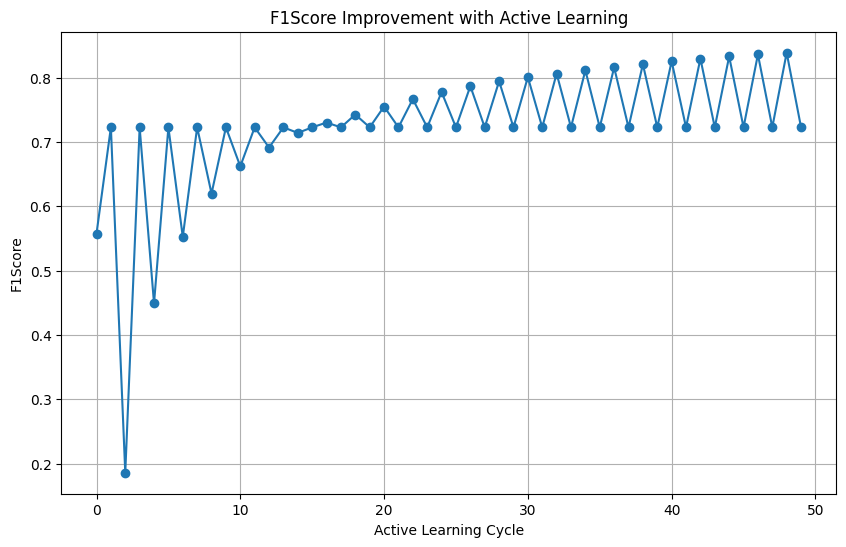

Testing F1Score:0.8409841472791029



In [6]:
clf2 = SklearnClassifier(SVC(probability=True), classes=np.unique(y_true),random_state=42)
qs = QueryByCommittee(method='vote_entropy',random_state=42)
classifier_list=[clf2 for _ in range(n_classifiers)]

clf2.fit(X_lbld, y_nan)

# Evaluate the classifier on the initial labeled data
y_pred_initial = clf2.predict(X_unlbld)
f1score_initial = f1_score(y_unlbld, y_pred_initial)
print("F1 Score before active learning:", f1score_initial)

# Active learning loop
n_cycles = 25
f1score_values2=[]
f1scores_initial2=[]

for c in range(n_cycles):
    
    for clff in classifier_list:
        clff.fit(X_lbld, y_nan)

        y_pred_initial = clff.predict(X_unlbld)
        f1score_initial = f1_score(y_unlbld, y_pred_initial)
        f1scores_initial2.append(f1score_initial)
        
    f1score=np.mean(f1scores_initial2)
    f1score_values2.append(f1score)
    # Get labeled instances
    X_tobelabeled=X_lbld[labeled_indices(y_nan)]
    
    # Query the next instance(s)
    query_idx = qs.query(X=X_lbld, y=y_nan, ensemble=classifier_list)
    
    # Label the queried instances
    y_nan[query_idx] = y_lbld[query_idx]

    
    # Evaluate the classifier
    for clff in classifier_list:
        clff.fit(X_lbld, y_nan)

        y_pred = clff.predict(X_unlbld)
        F1Score = f1_score(y_unlbld, y_pred)
        f1scores_initial2.append(F1Score)
        
    f1score=np.mean(f1scores_initial1)
    f1score_values2.append(f1score)
    
    print(f"F1 Score after active learning (Cycle {c+1}):", f1score)

plt.figure(figsize=(10, 6))
plt.plot(range(len(f1score_values2)), f1score_values2, marker='o')
plt.xlabel('Active Learning Cycle')
plt.ylabel('F1Score')
plt.title('F1Score Improvement with Active Learning')
plt.grid(True)
plt.show()


for clff in classifier_list:
    y_pred_test = clff.predict(X_unlbld)
    f1score = f1_score(y_unlbld, y_pred_test)
    f1scores_initial2.append(f1score)

f1score=np.mean(f1scores_initial2)
f1score_values1.append(f1score)


print(f"Testing F1Score:{f1score}\n")

# USxE

F1 Score before active learning: 0.5447619047619048
F1 Score after active learning (Cycle 1): 0.7708894878706198
F1 Score after active learning (Cycle 2): 0.7708894878706198
F1 Score after active learning (Cycle 3): 0.7708894878706198
F1 Score after active learning (Cycle 4): 0.8362573099415204
F1 Score after active learning (Cycle 5): 0.844903988183161
F1 Score after active learning (Cycle 6): 0.8524590163934427
F1 Score after active learning (Cycle 7): 0.8524590163934427
F1 Score after active learning (Cycle 8): 0.8558558558558558
F1 Score after active learning (Cycle 9): 0.8976377952755905
F1 Score after active learning (Cycle 10): 0.8976377952755905
F1 Score after active learning (Cycle 11): 0.8976377952755905
F1 Score after active learning (Cycle 12): 0.9082125603864735


/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:320: UserWarning: The 'base_estimator' could not be fitted because of 'There is no labeled data.'. Therefore, the class labels of the samples are counted and will be used to make predictions. The class label distribution is `_label_counts=[0, 0]`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:219: UserWarning: Since the 'base_estimator' could not be fitted when calling the `fit` method, the class label distribution`_label_counts=[0, 0]` is used to make the predictions.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:320: UserWarning: The 'base_estimator' could not be fitted because of 'There is no labeled data.'. Therefore, the class labels of the samples are counted and will be used to make predictions. The class label distribution is `_label_counts=[0, 0]`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/

F1 Score after active learning (Cycle 13): 0.9018987341772151
F1 Score after active learning (Cycle 14): 0.912621359223301
F1 Score after active learning (Cycle 15): 0.9087999999999999
F1 Score after active learning (Cycle 16): 0.912621359223301
F1 Score after active learning (Cycle 17): 0.9215686274509803
F1 Score after active learning (Cycle 18): 0.9141004862236629
F1 Score after active learning (Cycle 19): 0.9117174959871588
F1 Score after active learning (Cycle 20): 0.9073482428115016
F1 Score after active learning (Cycle 21): 0.8892355694227768
F1 Score after active learning (Cycle 22): 0.8878504672897196
F1 Score after active learning (Cycle 23): 0.8892355694227768
F1 Score after active learning (Cycle 24): 0.9059011164274322
F1 Score after active learning (Cycle 25): 0.8920187793427231


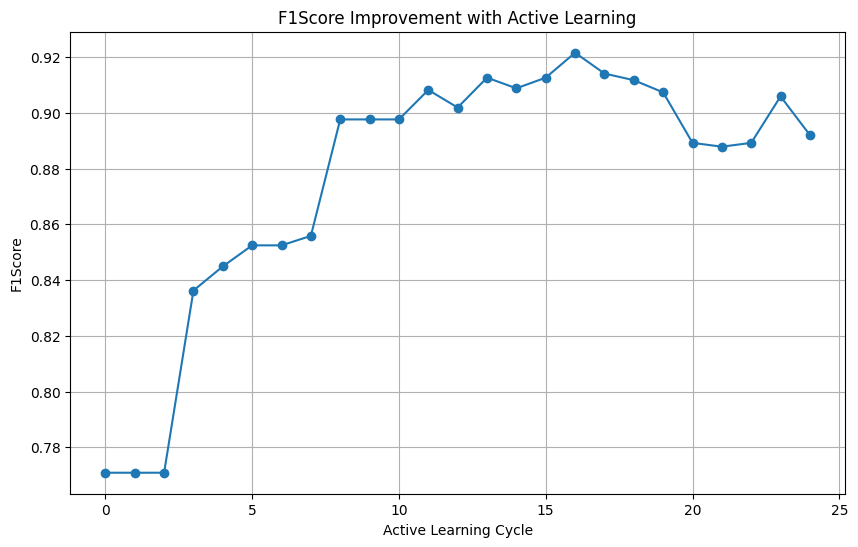

Testing F1Score:0.8920187793427231



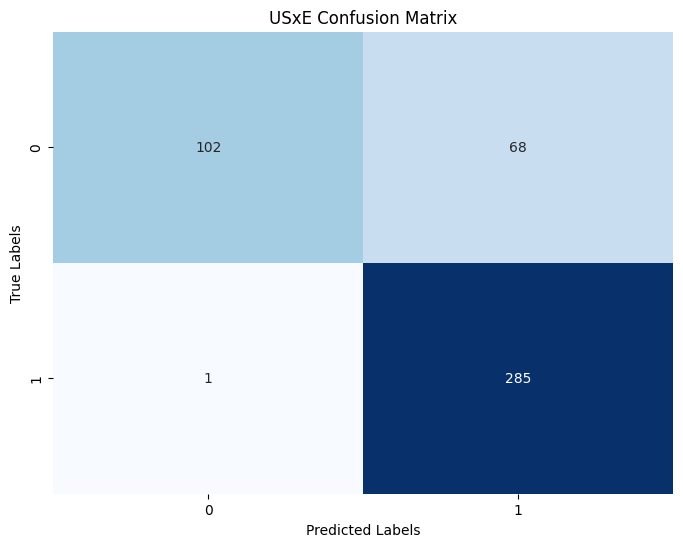

In [8]:
clf3 = SklearnClassifier(SVC(probability=True), classes=np.unique(y_true),random_state=42)
qs = UncertaintySampling(method='entropy',random_state=42)

clf3.fit(X_lbld, y_nan)

# Evaluate the classifier on the initial labeled data
y_pred_initial = clf3.predict(X_unlbld)
f1score_initial = f1_score(y_unlbld, y_pred_initial)
print("F1 Score before active learning:", f1score_initial)

# Active learning loop
n_cycles = 25
f1score_values3=[]

for c in range(n_cycles):
    
    # Get labeled instances
    X_tobelabeled=X_lbld[labeled_indices(y_nan)]
    
    # Query the next instance(s)
    query_idx = qs.query(X=X_lbld, y=y_nan, clf=clf3)
    
    # Label the queried instances
    y_nan[query_idx] = y_lbld[query_idx]


    clf3.fit(X_lbld, y_nan)
    

    # Evaluate the classifier
    y_pred = clf3.predict(X_unlbld)
    F1Score = f1_score(y_unlbld, y_pred)
    print(f"F1 Score after active learning (Cycle {c+1}):", F1Score)
    f1score_values3.append(F1Score)

plt.figure(figsize=(10, 6))
plt.plot(range(len(f1score_values3)), f1score_values3, marker='o')
plt.xlabel('Active Learning Cycle')
plt.ylabel('F1Score')
plt.title('F1Score Improvement with Active Learning')
plt.grid(True)

plt.show()


y_pred_test = clf3.predict(X_unlbld)
f1score = f1_score(y_unlbld, y_pred_test)
print(f"Testing F1Score:{f1score}\n")

confusionMatrix=confusion_matrix(y_unlbld,y_pred_test)

plt.figure(figsize=(8, 6)) 
sns.heatmap(confusionMatrix,annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels') 
plt.title('USxE Confusion Matrix') 
plt.show()

# USxMS 

/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:320: UserWarning: The 'base_estimator' could not be fitted because of 'There is no labeled data.'. Therefore, the class labels of the samples are counted and will be used to make predictions. The class label distribution is `_label_counts=[0, 0]`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:219: UserWarning: Since the 'base_estimator' could not be fitted when calling the `fit` method, the class label distribution`_label_counts=[0, 0]` is used to make the predictions.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:320: UserWarning: The 'base_estimator' could not be fitted because of 'There is no labeled data.'. Therefore, the class labels of the samples are counted and will be used to make predictions. The class label distribution is `_label_counts=[0, 0]`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/

F1 Score before active learning: 0.5708955223880597
F1 Score after active learning (Cycle 1): 0.0
F1 Score after active learning (Cycle 2): 0.922824302134647
F1 Score after active learning (Cycle 3): 0.0
F1 Score after active learning (Cycle 4): 0.8786127167630057
F1 Score after active learning (Cycle 5): 0.7708894878706198
F1 Score after active learning (Cycle 6): 0.8679817905918057
F1 Score after active learning (Cycle 7): 0.6757990867579908
F1 Score after active learning (Cycle 8): 0.8837209302325582
F1 Score after active learning (Cycle 9): 0.7916666666666667
F1 Score after active learning (Cycle 10): 0.9059011164274322
F1 Score after active learning (Cycle 11): 0.8562874251497006
F1 Score after active learning (Cycle 12): 0.8614457831325301
F1 Score after active learning (Cycle 13): 0.8627450980392156
F1 Score after active learning (Cycle 14): 0.8537313432835821
F1 Score after active learning (Cycle 15): 0.8864696734059099
F1 Score after active learning (Cycle 16): 0.9302325581395

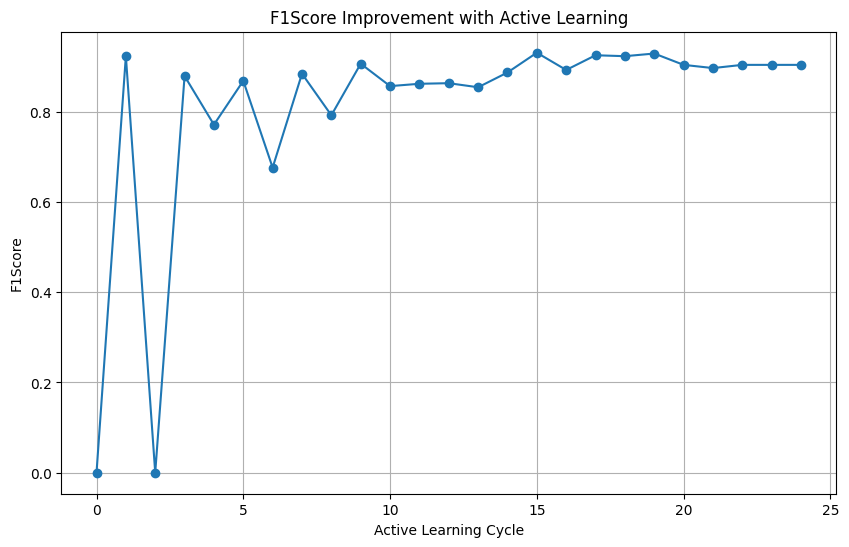

Testing F1Score:0.9033280507131537



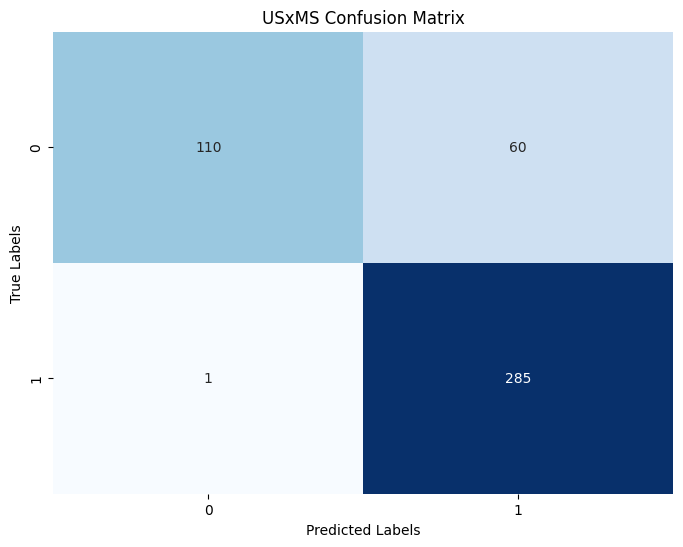

In [10]:
clf4 = SklearnClassifier(SVC(probability=True), classes=np.unique(y_true),random_state=42)
qs = UncertaintySampling(method='margin_sampling',random_state=42)

clf4.fit(X_lbld, y_nan)

# Evaluate the classifier on the initial labeled data
y_pred_initial = clf4.predict(X_unlbld)
f1score_initial = f1_score(y_unlbld, y_pred_initial)
print("F1 Score before active learning:", f1score_initial)

# Active learning loop
n_cycles = 25
f1score_values4=[]

for c in range(n_cycles):
    
    # Get labeled instances
    X_tobelabeled=X_lbld[labeled_indices(y_nan)]
    
    # Query the next instance(s)
    query_idx = qs.query(X=X_lbld, y=y_nan, clf=clf3)
    
    # Label the queried instances
    y_nan[query_idx] = y_lbld[query_idx]


    clf4.fit(X_lbld, y_nan)
    

    # Evaluate the classifier
    y_pred = clf4.predict(X_unlbld)
    F1Score = f1_score(y_unlbld, y_pred)
    print(f"F1 Score after active learning (Cycle {c+1}):", F1Score)
    f1score_values4.append(F1Score)

plt.figure(figsize=(10, 6))
plt.plot(range(len(f1score_values4)), f1score_values4, marker='o')
plt.xlabel('Active Learning Cycle')
plt.ylabel('F1Score')
plt.title('F1Score Improvement with Active Learning')
plt.grid(True)
plt.show()


y_pred_test = clf4.predict(X_unlbld)
f1score = f1_score(y_unlbld, y_pred_test)
print(f"Testing F1Score:{f1score}\n")

confusionMatrix=confusion_matrix(y_unlbld,y_pred_test)

plt.figure(figsize=(8, 6)) 
sns.heatmap(confusionMatrix,annot=True, fmt="d", cmap="Blues", cbar=False) 
plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels') 
plt.title('USxMS Confusion Matrix') 
plt.show()

# USxLC

/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:320: UserWarning: The 'base_estimator' could not be fitted because of 'There is no labeled data.'. Therefore, the class labels of the samples are counted and will be used to make predictions. The class label distribution is `_label_counts=[0, 0]`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:219: UserWarning: Since the 'base_estimator' could not be fitted when calling the `fit` method, the class label distribution`_label_counts=[0, 0]` is used to make the predictions.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:320: UserWarning: The 'base_estimator' could not be fitted because of 'There is no labeled data.'. Therefore, the class labels of the samples are counted and will be used to make predictions. The class label distribution is `_label_counts=[0, 0]`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/

F1 Score before active learning: 0.5626204238921001
F1 Score after active learning (Cycle 1): 0.9033280507131537
F1 Score after active learning (Cycle 2): 0.9033280507131537
F1 Score after active learning (Cycle 3): 0.9033280507131537
F1 Score after active learning (Cycle 4): 0.9033280507131537
F1 Score after active learning (Cycle 5): 0.9033280507131537
F1 Score after active learning (Cycle 6): 0.9033280507131537
F1 Score after active learning (Cycle 7): 0.9033280507131537
F1 Score after active learning (Cycle 8): 0.9033280507131537
F1 Score after active learning (Cycle 9): 0.9033280507131537
F1 Score after active learning (Cycle 10): 0.9033280507131537
F1 Score after active learning (Cycle 11): 0.9033280507131537
F1 Score after active learning (Cycle 12): 0.9033280507131537
F1 Score after active learning (Cycle 13): 0.9033280507131537
F1 Score after active learning (Cycle 14): 0.9033280507131537
F1 Score after active learning (Cycle 15): 0.9033280507131537
F1 Score after active learn

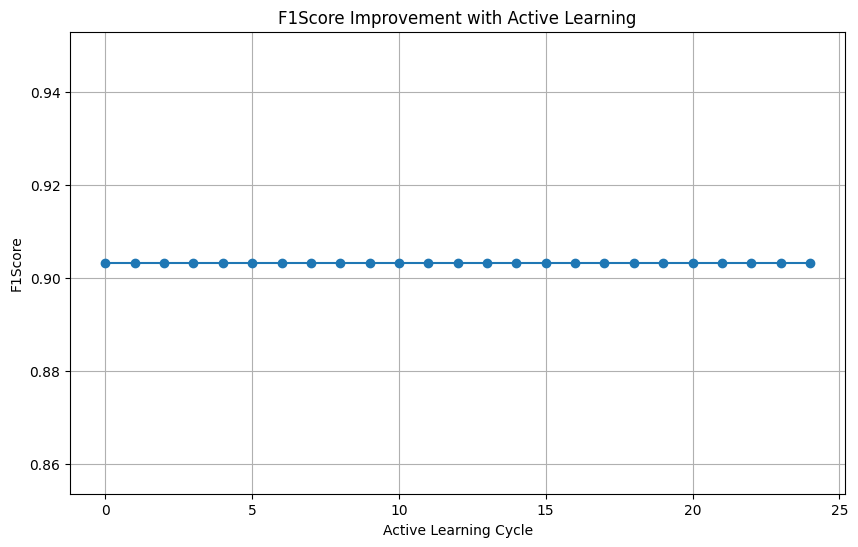

Testing F1Score:0.9033280507131537



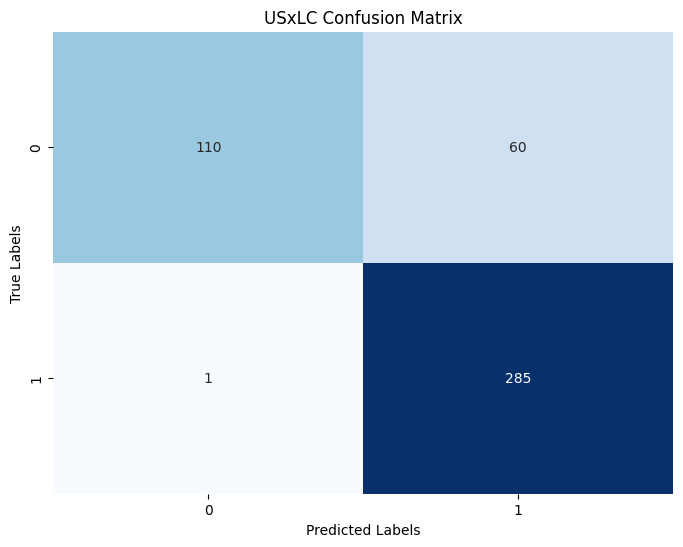

In [12]:
clf5 = SklearnClassifier(SVC(probability=True), classes=np.unique(y_true),random_state=42)
qs = UncertaintySampling(method='least_confident',random_state=42)

clf5.fit(X_lbld, y_nan)

# Evaluate the classifier on the initial labeled data
y_pred_initial = clf5.predict(X_unlbld)
f1score_initial = f1_score(y_unlbld, y_pred_initial)
print("F1 Score before active learning:", f1score_initial)

# Active learning loop
n_cycles = 25
f1score_values5=[]

for c in range(n_cycles):
    
    # Get labeled instances
    X_tobelabeled=X_lbld[labeled_indices(y_nan)]
    
    # Query the next instance(s)
    query_idx = qs.query(X=X_lbld, y=y_nan, clf=clf3)
    
    # Label the queried instances
    y_nan[query_idx] = y_lbld[query_idx]


    clf5.fit(X_lbld, y_nan)
    

    # Evaluate the classifier
    y_pred = clf4.predict(X_unlbld)
    F1Score = f1_score(y_unlbld, y_pred)
    print(f"F1 Score after active learning (Cycle {c+1}):", F1Score)
    f1score_values5.append(F1Score)

plt.figure(figsize=(10, 6))
plt.plot(range(len(f1score_values5)), f1score_values5, marker='o')
plt.xlabel('Active Learning Cycle')
plt.ylabel('F1Score')
plt.title('F1Score Improvement with Active Learning')
plt.grid(True)
plt.show()


y_pred_test = clf4.predict(X_unlbld)
f1score = f1_score(y_unlbld, y_pred_test)
print(f"Testing F1Score:{f1score}\n")

confusionMatrix=confusion_matrix(y_unlbld,y_pred_test)

plt.figure(figsize=(8, 6)) 
sns.heatmap(confusionMatrix,annot=True, fmt="d", cmap="Blues", cbar=False) 
plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels') 
plt.title('USxLC Confusion Matrix') 
plt.show()

# Putting all plots together for appraoch 1

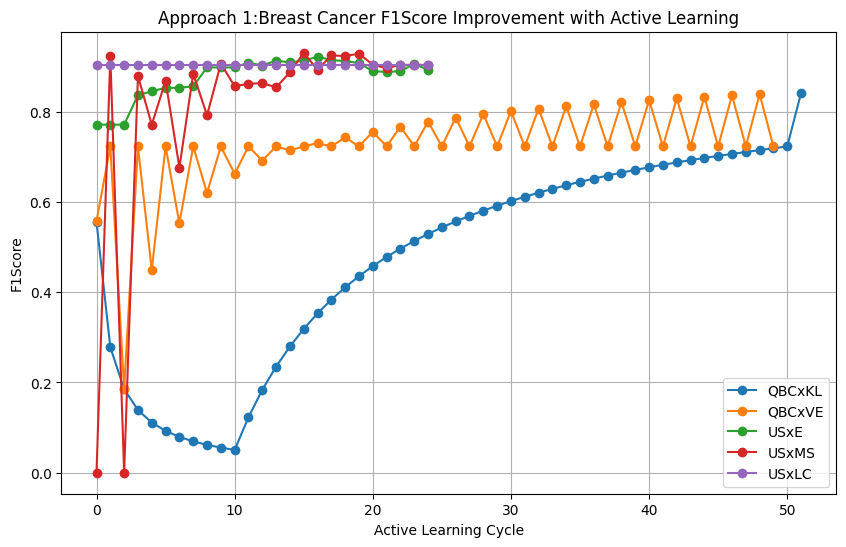

In [13]:
# Plotting F1Score over cycles for all four scenarios
plt.figure(figsize=(10, 6))

# Plotting F1Score values for scenario 1
plt.plot(range(len(f1score_values1)), f1score_values1, marker='o', label='QBCxKL')

# Plotting F1Score values for scenario 2
plt.plot(range(len(f1score_values2)), f1score_values2, marker='o', label='QBCxVE')

# Plotting F1Score values for scenario 3
plt.plot(range(len(f1score_values3)), f1score_values3, marker='o', label='USxE')

# Plotting F1Score values for scenario 4
plt.plot(range(len(f1score_values4)), f1score_values4, marker='o', label='USxMS')

# Plotting F1Score values for scenario 5
plt.plot(range(len(f1score_values5)), f1score_values5, marker='o', label='USxLC')

plt.xlabel('Active Learning Cycle')
plt.ylabel('F1Score')
plt.title('Approach 1:Breast Cancer F1Score Improvement with Active Learning')
plt.grid(True)
plt.legend()  # Show the legend with labels for each scenario
plt.show()


# --------------------------------------------------------------------------------------------------------------------

# **B-Approach 2**

# Breast Cancer Dataset

# 1-QueryByCommittee

In [14]:
# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X, y, test_size=0.7, random_state=42)

y_nan = np.full(shape=y_unlabeled.shape, fill_value=MISSING_LABEL)

y_combined = np.concatenate((y_labeled, y_nan))

# Create a SVC classifier
clf = SklearnClassifier(BaggingClassifier(SVC(probability=True)), classes=[0, 1], random_state=42)

# Train the classifier on the labeled data
clf.fit(X, y_combined)

# Evaluate the classifier on the initial labeled data
y_pred_initial = clf.predict(X_labeled)
f1score_initial = f1_score(y_labeled, y_pred_initial)
print("F1 Score before active learning:", f1score_initial)

y_pred_test1 = clf.predict(X_unlabeled)
# print(y_pred_test)
f1score = f1_score(y_unlabeled, y_pred_test1)
print("Testing F1 Score before:", f1score)


F1 Score before active learning: 0.7313432835820896
Testing F1 Score before: 0.7872340425531915


F1 Score after active learning cycle 0: 0.7710583153347732
F1 Score after active learning cycle 1: 0.7710583153347732
F1 Score after active learning cycle 2: 0.7710583153347732
F1 Score after active learning cycle 3: 0.7710583153347732
F1 Score after active learning cycle 4: 0.7769314472252449
F1 Score after active learning cycle 5: 0.8283062645011601
F1 Score after active learning cycle 6: 0.8489892984542212
F1 Score after active learning cycle 7: 0.8612786489746683
F1 Score after active learning cycle 8: 0.85
F1 Score after active learning cycle 9: 0.8633615477629988
F1 Score after active learning cycle 10: 0.8675577156743621
F1 Score after active learning cycle 11: 0.865127582017011
F1 Score after active learning cycle 12: 0.8955974842767296
F1 Score after active learning cycle 13: 0.8955974842767296
F1 Score after active learning cycle 14: 0.8955974842767296
F1 Score after active learning cycle 15: 0.8967254408060454
F1 Score after active learning cycle 16: 0.8888888888888888
F1 Sc

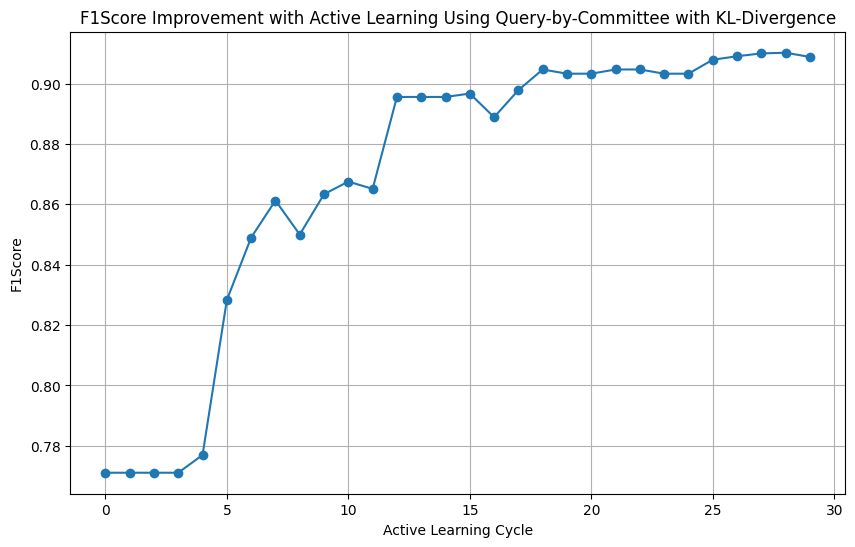

In [15]:
# Active learning loop
n_cycles = 30
batch_size = 13
qs = QueryByCommittee(method='KL_divergence', random_state=42)
f1score_values_of_QueryByCommittee = []
for c in range(n_cycles):
    # Get labeled instances
    labeled_idx = unlabeled_indices(y_combined)
    # print(labeled_idx)
    X_new = X[labeled_idx]
    y_new = y_combined[labeled_idx]
    # print(X_new, y_new)
    
    # Fit the classifier on the updated labeled data
    clf.fit(X, y_combined)

    # Query the next instance/s.
    query_idx = qs.query(X=X, y=y_combined, ensemble=[clf], batch_size=batch_size)

    # Label the queried instances.
    y_combined[query_idx] = y[query_idx]
    y_pred_active = clf.predict(X)
    f1score_active = f1_score(y, y_pred_active)
    f1score_values_of_QueryByCommittee.append(f1score_active)

    print(f"F1 Score after active learning cycle {c}: {f1score_active}")

    
# Testing the classifier
y_pred_test = clf.predict(X_unlabeled)
f1score = f1_score(y_unlabeled, y_pred_test)
print(f"Testing F1Score:{f1score}\n")  

# Plotting F1Score over cycles
plt.figure(figsize=(10, 6))
plt.plot(range(len(f1score_values_of_QueryByCommittee)), f1score_values_of_QueryByCommittee, marker='o')
plt.xlabel('Active Learning Cycle')
plt.ylabel('F1Score')
plt.title('F1Score Improvement with Active Learning Using Query-by-Committee with KL-Divergence')
plt.grid(True)
plt.show()

# 2-Random Sampling

In [16]:
# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X, y, test_size=0.7, random_state=42)

y_nan = np.full(shape=y_unlabeled.shape, fill_value=MISSING_LABEL)

y_combined = np.concatenate((y_labeled, y_nan))

# Create a SVC classifier
clf = SklearnClassifier(BaggingClassifier(SVC(probability=True)), classes=[0, 1], random_state=42)

# Train the classifier on the labeled data
clf.fit(X, y_combined)

# Evaluate the classifier on the initial labeled data
y_pred_initial = clf.predict(X_labeled)
f1score_initial = f1_score(y_labeled, y_pred_initial)
print("F1 Score before active learning:", f1score_initial)

y_pred_test1 = clf.predict(X_unlabeled)
# print(y_pred_test)
f1score = f1_score(y_unlabeled, y_pred_test1)
print("Testing F1 Score before:", f1score)

F1 Score before active learning: 0.7313432835820896
Testing F1 Score before: 0.7872340425531915


F1 Score after active learning cycle 0: 0.779475982532751
F1 Score after active learning cycle 1: 0.7710583153347732
F1 Score after active learning cycle 2: 0.7710583153347732
F1 Score after active learning cycle 3: 0.7744034707158352
F1 Score after active learning cycle 4: 0.7863436123348018
F1 Score after active learning cycle 5: 0.8244803695150115
F1 Score after active learning cycle 6: 0.816933638443936
F1 Score after active learning cycle 7: 0.85
F1 Score after active learning cycle 8: 0.8707317073170732
F1 Score after active learning cycle 9: 0.8771498771498771
F1 Score after active learning cycle 10: 0.8811881188118812
F1 Score after active learning cycle 11: 0.8771498771498771
F1 Score after active learning cycle 12: 0.8717948717948718
F1 Score after active learning cycle 13: 0.8844720496894409
F1 Score after active learning cycle 14: 0.8888888888888888
F1 Score after active learning cycle 15: 0.8844720496894409
F1 Score after active learning cycle 16: 0.8866749688667496
F1 Sco

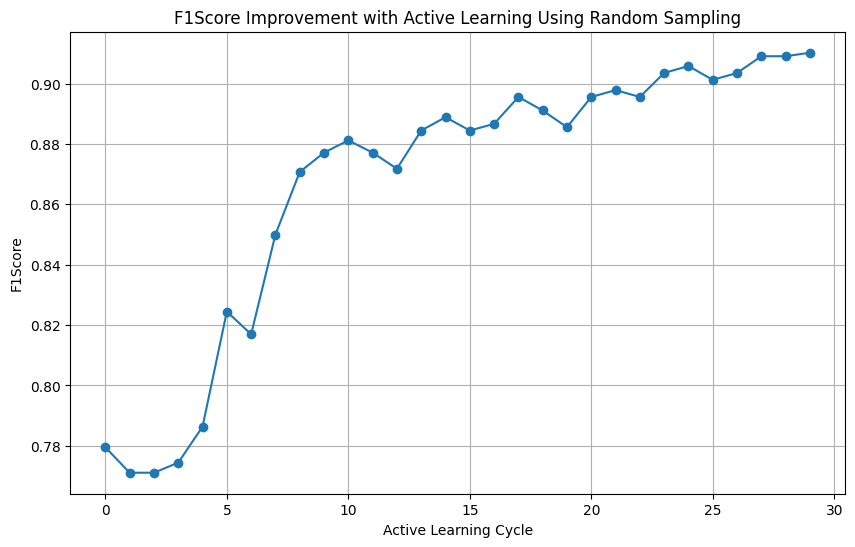

Testing F1Score:0.9297297297297297



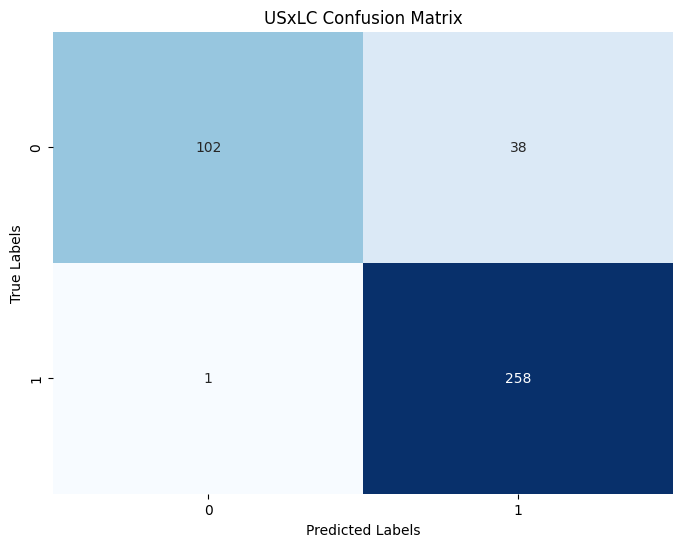

In [17]:
# Active learning loop
n_cycles = 30
batch_size = 13
qs = RandomSampling(random_state=42)
f1score_values_of_RandomSampling = []
for c in range(n_cycles):
    # Get labeled instances
    labeled_idx = unlabeled_indices(y_combined)
    # print(labeled_idx)
    X_new = X[labeled_idx]
    y_new = y_combined[labeled_idx]
    # print(X_new, y_new)
    
    # Fit the classifier on the updated labeled data
    clf.fit(X, y_combined)

    # Query the next instance/s.
    query_idx = qs.query(X=X, y=y_combined, batch_size=batch_size)

    # Label the queried instances.
    y_combined[query_idx] = y[query_idx]
    # print (y_combined)
    y_pred_active = clf.predict(X)
    f1score_active = f1_score(y, y_pred_active)
    f1score_values_of_RandomSampling.append(f1score_active)

    print(f"F1 Score after active learning cycle {c}: {f1score_active}")

# Plotting F1Score over cycles
plt.figure(figsize=(10, 6))
plt.plot(range(len(f1score_values_of_RandomSampling)), f1score_values_of_RandomSampling, marker='o')
plt.xlabel('Active Learning Cycle')
plt.ylabel('F1Score')
plt.title('F1Score Improvement with Active Learning Using Random Sampling')
plt.grid(True)
plt.show()

# print("F1Score after active learning:", f1score_active)

# Testing the classifier
y_pred_test = clf.predict(X_unlabeled)
f1score = f1_score(y_unlabeled, y_pred_test)
print(f"Testing F1Score:{f1score}\n")


confusionMatrix=confusion_matrix(y_unlabeled, y_pred_test)

plt.figure(figsize=(8, 6)) 
sns.heatmap(confusionMatrix,annot=True, fmt="d", cmap="Blues", cbar=False) 
plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels') 
plt.title('USxLC Confusion Matrix') 
plt.show()

# 3-Margin Sampling

In [18]:
# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X, y, test_size=0.7, random_state=42)

y_nan = np.full(shape=y_unlabeled.shape, fill_value=MISSING_LABEL)

y_combined = np.concatenate((y_labeled, y_nan))

# Create a SVC classifier
clf = SklearnClassifier(BaggingClassifier(SVC(probability=True)), classes=[0, 1], random_state=42)

# Train the classifier on the labeled data
clf.fit(X, y_combined)

# Evaluate the classifier on the initial labeled data
y_pred_initial = clf.predict(X_labeled)
f1score_initial = f1_score(y_labeled, y_pred_initial)
print("F1 Score before active learning:", f1score_initial)

y_pred_test1 = clf.predict(X_unlabeled)
# print(y_pred_test)
f1score = f1_score(y_unlabeled, y_pred_test1)
print("Testing F1 Score before:", f1score)

F1 Score before active learning: 0.7368421052631579
Testing F1 Score before: 0.7944785276073619


F1 Score after active learning cycle 0: 0.7710583153347732
F1 Score after active learning cycle 1: 0.8479809976247031
F1 Score after active learning cycle 2: 0.8877146631439894
F1 Score after active learning cycle 3: 0.907928388746803
F1 Score after active learning cycle 4: 0.910039113428944
F1 Score after active learning cycle 5: 0.8928121059268601
F1 Score after active learning cycle 6: 0.9263721552878178
F1 Score after active learning cycle 7: 0.9105058365758756
F1 Score after active learning cycle 8: 0.8936742934051144
F1 Score after active learning cycle 9: 0.9076923076923076
F1 Score after active learning cycle 10: 0.9206762028608583
F1 Score after active learning cycle 11: 0.9194805194805195
F1 Score after active learning cycle 12: 0.9114249037227214
F1 Score after active learning cycle 13: 0.907928388746803
F1 Score after active learning cycle 14: 0.9114249037227214
F1 Score after active learning cycle 15: 0.9123711340206186
F1 Score after active learning cycle 16: 0.9170984455

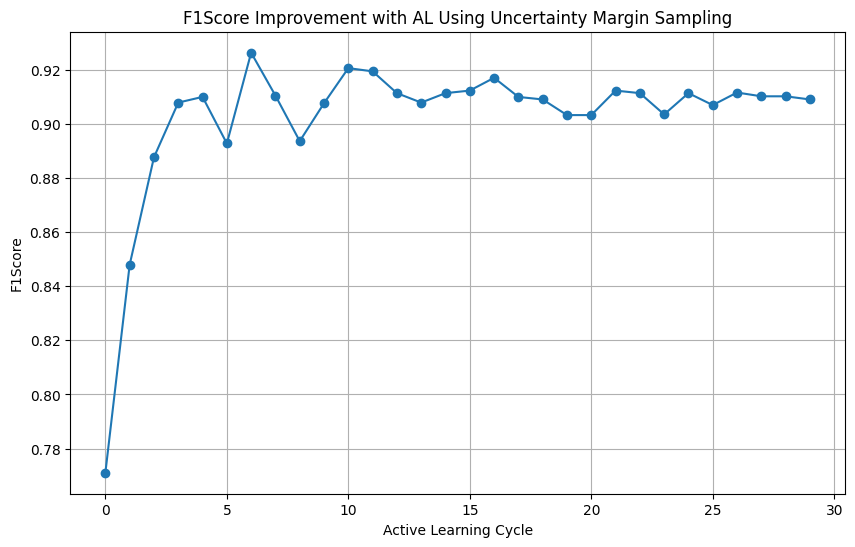

Testing F1Score:0.9280575539568345



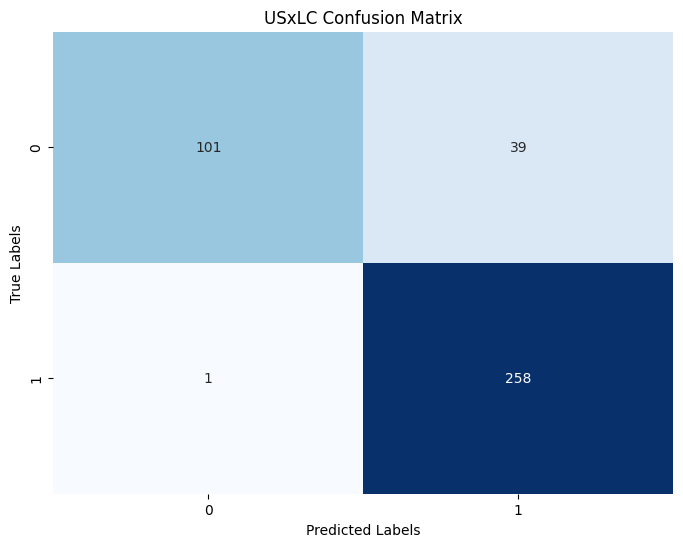

In [19]:
# Active learning loop
n_cycles = 30
batch_size = 13
qs = UncertaintySampling(method='margin_sampling', random_state=42)
f1score_values_of_margin_sampling = []
for c in range(n_cycles):
    # Get labeled instances
    labeled_idx = unlabeled_indices(y_combined)
    # print(labeled_idx)
    X_new = X[labeled_idx]
    y_new = y_combined[labeled_idx]
    # print(X_new, y_new)
    
    # Fit the classifier on the updated labeled data
    clf.fit(X, y_combined)

    # Query the next instance/s.
    query_idx = qs.query(X=X, y=y_combined, clf=clf, batch_size=batch_size)

    # Label the queried instances.
    y_combined[query_idx] = y[query_idx]
    # print (y_combined)
    y_pred_active = clf.predict(X)
    f1score_active = f1_score(y, y_pred_active)
    f1score_values_of_margin_sampling.append(f1score_active)  # Store F1Score for visualization

    print(f"F1 Score after active learning cycle {c}: {f1score_active}")

# Plotting F1Score over cycles
plt.figure(figsize=(10, 6))
plt.plot(range(len(f1score_values_of_margin_sampling)), f1score_values_of_margin_sampling, marker='o')
plt.xlabel('Active Learning Cycle')
plt.ylabel('F1Score')
plt.title('F1Score Improvement with AL Using Uncertainty Margin Sampling')
plt.grid(True)
plt.show()

# print("F1Score after active learning:", f1score_active)

# Testing the classifier
y_pred_test = clf.predict(X_unlabeled)
f1score = f1_score(y_unlabeled, y_pred_test)
print(f"Testing F1Score:{f1score}\n")

confusionMatrix=confusion_matrix(y_unlabeled, y_pred_test)

plt.figure(figsize=(8, 6)) 
sns.heatmap(confusionMatrix,annot=True, fmt="d", cmap="Blues", cbar=False) 
plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels') 
plt.title('USxLC Confusion Matrix') 
plt.show()

# 4-Entropy Sampling

In [20]:
# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X, y, test_size=0.7, random_state=42)

y_nan = np.full(shape=y_unlabeled.shape, fill_value=MISSING_LABEL)

y_combined = np.concatenate((y_labeled, y_nan))

# Create a SVC classifier
clf = SklearnClassifier(BaggingClassifier(SVC(probability=True)), classes=[0, 1], random_state=42)

# Train the classifier on the labeled data
clf.fit(X, y_combined)

# Evaluate the classifier on the initial labeled data
y_pred_initial = clf.predict(X_labeled)
f1score_initial = f1_score(y_labeled, y_pred_initial)
print("F1 Score before active learning:", f1score_initial)

y_pred_test1 = clf.predict(X_unlabeled)
# print(y_pred_test)
f1score = f1_score(y_unlabeled, y_pred_test1)
print("Testing F1 Score before:", f1score)

F1 Score before active learning: 0.7368421052631579
Testing F1 Score before: 0.7884322678843226


F1 Score after active learning cycle 0: 0.7710583153347732
F1 Score after active learning cycle 1: 0.7846153846153847
F1 Score after active learning cycle 2: 0.8654545454545455
F1 Score after active learning cycle 3: 0.9088575096277279
F1 Score after active learning cycle 4: 0.9047013977128335
F1 Score after active learning cycle 5: 0.9057142857142856
F1 Score after active learning cycle 6: 0.8711656441717792
F1 Score after active learning cycle 7: 0.910025706940874
F1 Score after active learning cycle 8: 0.9317269076305221
F1 Score after active learning cycle 9: 0.931909212283044
F1 Score after active learning cycle 10: 0.9170984455958548
F1 Score after active learning cycle 11: 0.9123711340206186
F1 Score after active learning cycle 12: 0.9123711340206186
F1 Score after active learning cycle 13: 0.9081632653061225
F1 Score after active learning cycle 14: 0.905852417302799
F1 Score after active learning cycle 15: 0.9125964010282778
F1 Score after active learning cycle 16: 0.9111969111

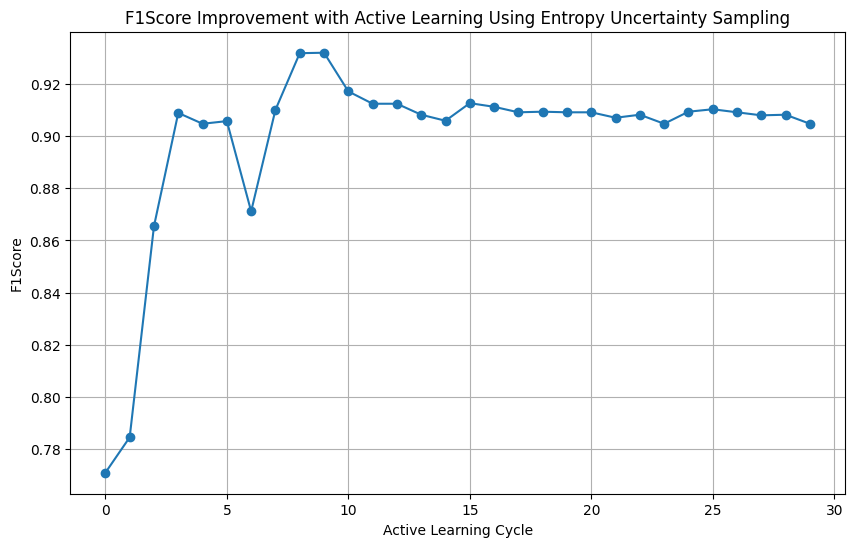

Testing F1Score:0.9233511586452763



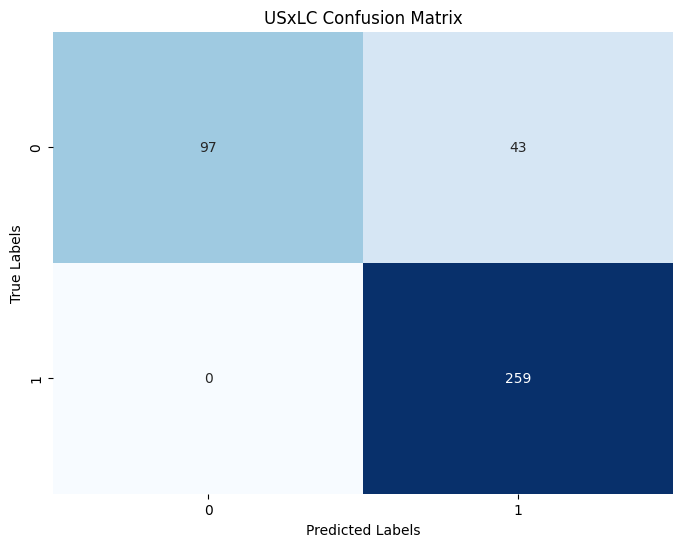

In [21]:
# Active learning loop
n_cycles = 30
batch_size = 13
qs = UncertaintySampling(method='entropy', random_state=42)
f1score_values_of_Entropy= []
for c in range(n_cycles):
    # Get labeled instances
    labeled_idx = unlabeled_indices(y_combined)
    # print(labeled_idx)
    X_new = X[labeled_idx]
    y_new = y_combined[labeled_idx]
    # print(X_new, y_new)
    
    # Fit the classifier on the updated labeled data
    clf.fit(X, y_combined)

    # Query the next instance/s.
    query_idx = qs.query(X=X, y=y_combined, clf=clf, batch_size=batch_size)

    # Label the queried instances.
    y_combined[query_idx] = y[query_idx]
    # print (y_combined)
    y_pred_active = clf.predict(X)
    f1score_active = f1_score(y, y_pred_active)
    f1score_values_of_Entropy.append(f1score_active)  # Store F1Score for visualization

    print(f"F1 Score after active learning cycle {c}: {f1score_active}")

# Plotting F1Score over cycles
plt.figure(figsize=(10, 6))
plt.plot(range(len(f1score_values_of_Entropy)), f1score_values_of_Entropy, marker='o')
plt.xlabel('Active Learning Cycle')
plt.ylabel('F1Score')
plt.title('F1Score Improvement with Active Learning Using Entropy Uncertainty Sampling')
plt.grid(True)
plt.show()

# print("F1Score after active learning:", f1score_active)

# Testing the classifier
y_pred_test = clf.predict(X_unlabeled)
f1score = f1_score(y_unlabeled, y_pred_test)
print(f"Testing F1Score:{f1score}\n")


confusionMatrix=confusion_matrix(y_unlabeled, y_pred_test)

plt.figure(figsize=(8, 6)) 
sns.heatmap(confusionMatrix,annot=True, fmt="d", cmap="Blues", cbar=False) 
plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels') 
plt.title('USxLC Confusion Matrix') 
plt.show()

# Putting all plots together for approach 2

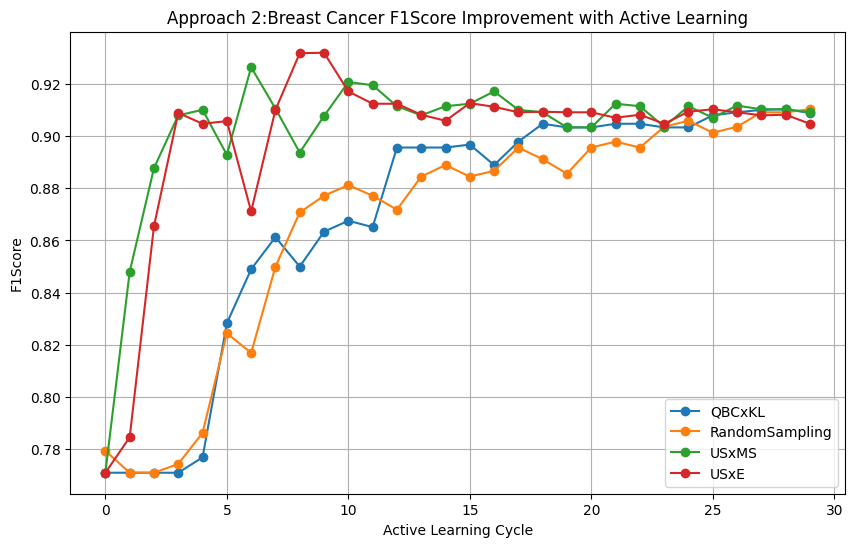

In [22]:
# Plotting F1Score over cycles for all four scenarios
plt.figure(figsize=(10, 6))

# Plotting F1Score values for scenario 1
plt.plot(range(len(f1score_values_of_QueryByCommittee)), f1score_values_of_QueryByCommittee, marker='o', label='QBCxKL')

# Plotting F1Score values for scenario 2
plt.plot(range(len(f1score_values_of_RandomSampling)), f1score_values_of_RandomSampling, marker='o', label='RandomSampling')

# Plotting F1Score values for scenario 3
plt.plot(range(len(f1score_values_of_margin_sampling)), f1score_values_of_margin_sampling, marker='o', label='USxMS')

# Plotting F1Score values for scenario 4
plt.plot(range(len(f1score_values_of_Entropy)), f1score_values_of_Entropy, marker='o', label='USxE')

plt.xlabel('Active Learning Cycle')
plt.ylabel('F1Score')
plt.title('Approach 2:Breast Cancer F1Score Improvement with Active Learning')
plt.grid(True)
plt.legend()
plt.show()